<a href="https://colab.research.google.com/github/Saifullah785/Machine_Learning_Projects/blob/main/Project_23_Medical_Insurance_Prediction_Model/Project_23_Medical_Insurance_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flow Of Project

1 Import Data

2 Proprocess Data

3 Visualize Data

4 Train test split

5 Train Model and Avualivation

6 Prediction System with Web app

Import Necessary Packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [2]:
medical_df = pd.read_csv('insurance.csv')

In [3]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# About the Data
- age: age of the insured person (numeric)
- sex: gender of the insured person (categorical: male/female)
- bmi: body mass index of the insured person (numeric)
- children: number of children covered by the insurance plan (numeric)
- smoker: whether or not the insured person is a smoker (categorical: yes/no)
- region: region where the insured person resides (categorical: northeast/northwest/southeast/southwest)
- charges: the insurance charges/costs billed to the insured person (numeric)

# Exploring Data & Analysing Data

In [4]:
medical_df.shape

(1338, 7)

In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Visualization

<Figure size 300x300 with 0 Axes>

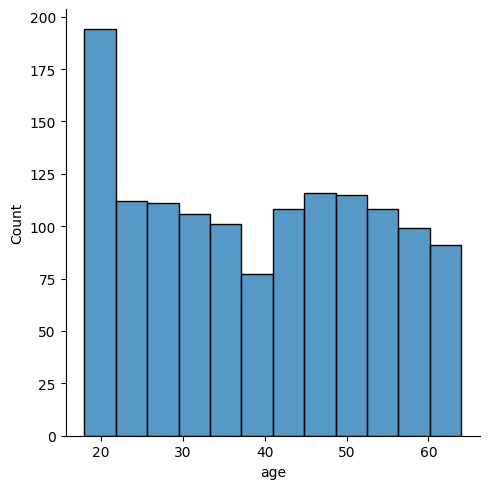

In [8]:
plt.figure(figsize=(3,3))
sns.displot(data = medical_df, x='age')